In [4]:
import pandas as pd
#import datetime as dt
import matplotlib as mpl
import ffn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
stickers = ['VNINDEX','SSI','REE','PVT','HCM']
sticker = 'SSI'
start = '2018-01-01' #dt.date(2018,1,1)
end = '2020-10-01' #dt.date(2020,10,1)

In [6]:
def get_stock(sticker,start='2017-01-01',end='2020-10-02'):
    #sticker = 'SSI'
    #start = '2017-01-01'
    file = "data/" + sticker + ".csv" 
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    df.index = df['date']
    del df['date']
    del df['name']
    # Create header 2 layer
    names = df.columns.tolist()
    sub = [sticker for _ in range(len(names))]
    header = [names,sub]
    df.columns = header
    # Filter dataframe with start and end date
    df = df.loc[start:end]
    return df

In [7]:
def get_adj_portfolio(stickers,start_date='2018-01-01',end_date='2020-10-02'):
    df = pd.DataFrame()
    for i in range(len(stickers)):
        if(i==0): 
            sticker = stickers[i]
            df = get_stock(sticker,start_date,end_date)
        else:
            sticker = stickers[i]
            df1 = get_stock(sticker,start_date,end_date)
            df = df.join(df1,how='inner')
    return(df['adj_close'])

In [12]:
prices = get_adj_portfolio(stickers,start,end)
prices.head()

,VNINDEX,SSI,REE,PVT,HCM
date,,,,,
2020-02-10,909.91,17.75,40.15,14.10,21.80
2020-01-10,914.09,17.80,41.80,13.60,22.15
2020-09-30,905.21,16.95,40.20,13.45,21.00
2020-09-29,903.98,16.75,39.95,13.50,20.75
2020-09-28,912.50,16.90,40.30,13.65,20.70


In [25]:
prices.pct_change().dropna()

,VNINDEX,SSI,REE,PVT,HCM
date,,,,,
2020-01-10,0.004594,0.002817,0.041096,-0.035461,0.016055
2020-09-30,-0.009715,-0.047753,-0.038278,-0.011029,-0.051919
2020-09-29,-0.001359,-0.011799,-0.006219,0.003717,-0.011905
2020-09-28,0.009425,0.008955,0.008761,0.011111,-0.002410
2020-09-25,-0.004636,-0.026627,0.002481,-0.036630,-0.024155
...,...,...,...,...,...
2018-08-01,-0.010314,-0.010254,-0.015881,-0.036708,0.000000
2018-05-01,-0.010021,-0.020270,-0.006993,0.019053,-0.013123
2018-04-01,0.007011,0.041379,0.016251,0.016285,0.024696


<Figure size 6400x8000 with 0 Axes>

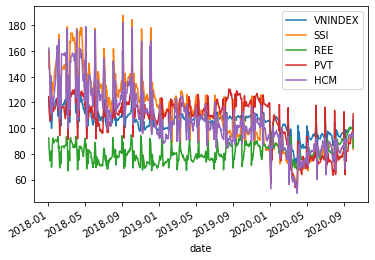

In [29]:
#figure(num=None, figsize=(80, 100), dpi=80, facecolor='w', edgecolor='k')
prices.rebase().plot()

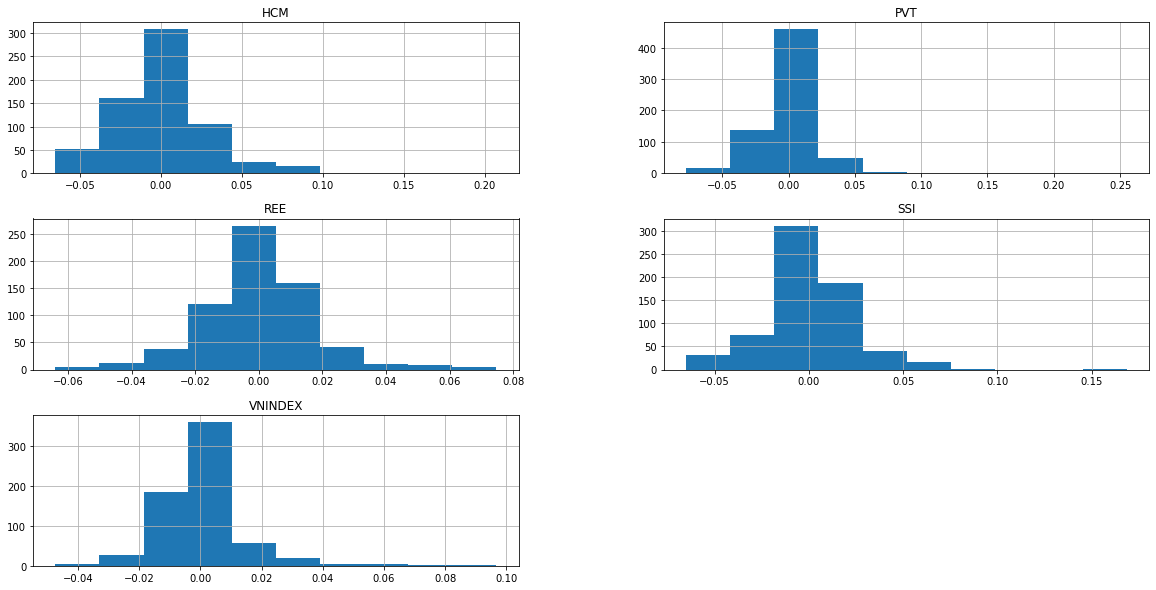

In [50]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(20, 10))

In [33]:
stats = prices.calc_stats()
stats.display()

Stat                 VNINDEX     SSI         REE         PVT         HCM
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2020-02-10  2020-02-10  2020-02-10  2020-02-10  2020-02-10
End                  2018-02-01  2018-02-01  2018-02-01  2018-02-01  2018-02-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         9.44%       23.38%      -6.55%      19.79%      16.65%
Daily Sharpe         0.39        0.57        0.49        0.70        0.77
Daily Sortino        0.65        1.04        0.82        1.27        1.43
CAGR                 -4.52%      -18.49%     -3.05%      -4.11%      -18.39%
Max Drawdown         -45.26%     -72.05%     -34.69%     -60.52%     -72.92%
Calmar Ratio         -0.10       -0.26       -0.09       -0.07       -0.25

MTD                  7.00%       -12.51%     -15.35%     16.36%      -3.57%
3m                   1.01%       0.27%       -2.58%      -4.57%      0.00%
6m    

/Users/nhacheat/anaconda3/lib/python3.8/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


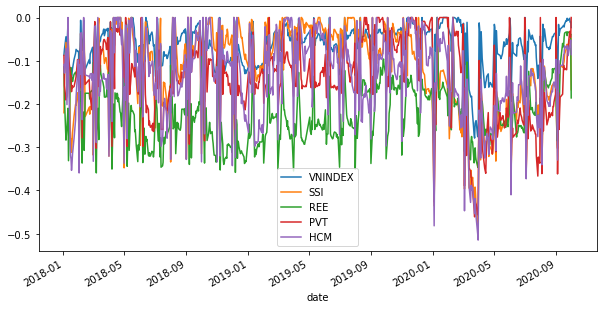

In [34]:
ax = stats.prices.to_drawdown_series().plot()

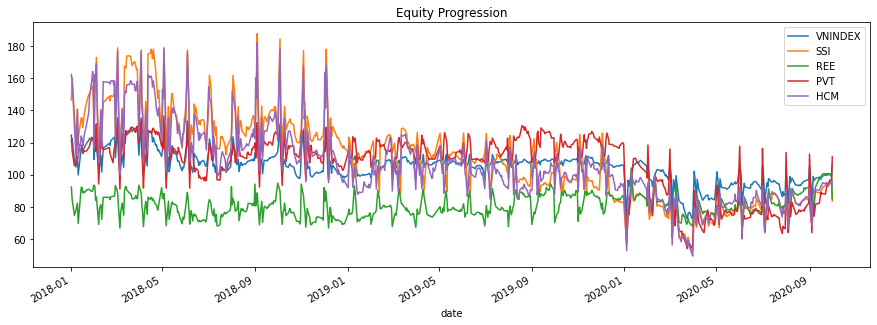

In [37]:
stats.plot()

In [39]:
stats.stats

,VNINDEX,SSI,REE,PVT,HCM
start,2020-02-10 00:00:00,2020-02-10 00:00:00,2020-02-10 00:00:00,2020-02-10 00:00:00,2020-02-10 00:00:00
end,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00
rf,0,0,0,0,0
total_return,0.094361,0.233803,-0.0655044,0.197872,0.166514
cagr,-0.0451864,-0.184908,-0.0304884,-0.0410667,-0.183883
max_drawdown,-0.452633,-0.720456,-0.34689,-0.605195,-0.729219
calmar,-0.09983,-0.256654,-0.0878906,-0.0678569,-0.252164
mtd,0.0699617,-0.125074,-0.153483,0.163569,-0.0357143
three_month,0.0100743,0.00270453,-0.0257658,-0.0457317,0
six_month,0.461881,0.57766,0.24652,0.993631,0.883721


In [51]:
returns = prices.to_returns().dropna()

<module 'matplotlib.pyplot' from '/Users/nhacheat/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

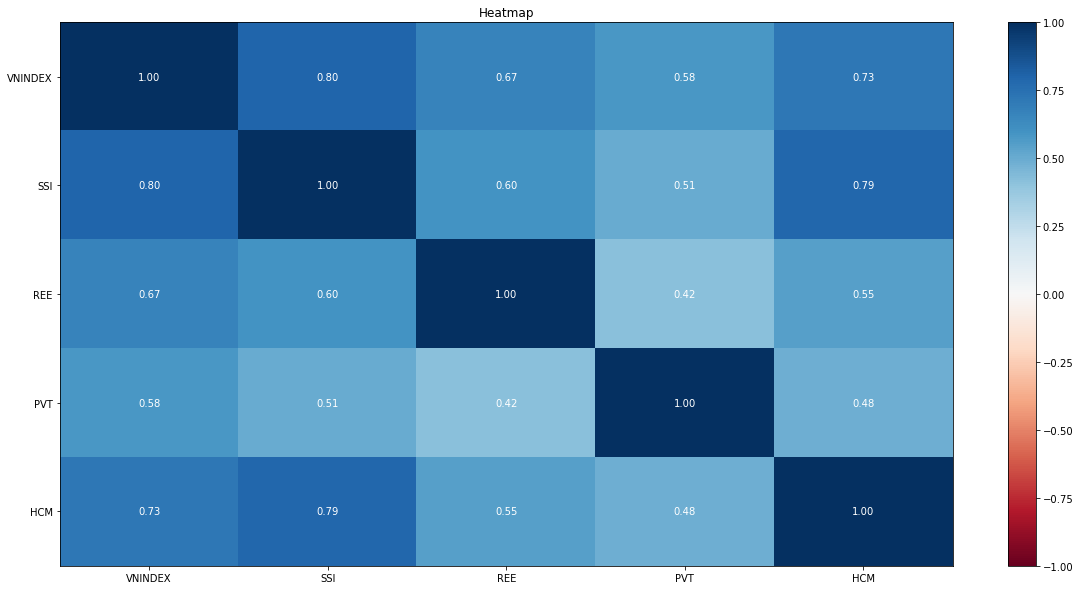

In [53]:
returns.plot_corr_heatmap()